# Week-1 Assignment

# **Gotta catch 'em all !**

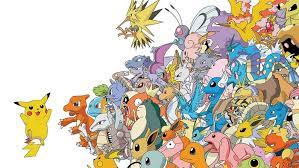

**Welcome to your first graded assignment! Hope that you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We have got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2) Read the csv file and assign it to a variable .

In [2]:
pokemons=pd.read_csv('https://drive.google.com/uc?export=download&id=1n_WVE7ax4gomqDyLvDFUYh8kTGQG38uz')

### 3) Display shape of dataframe
Expected Output - (800, 13)

In [3]:
pokemons.shape

(800, 13)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [4]:
pokemons.columns.values


array(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
       'Legendary'], dtype=object)

### 5) Remove the column '#' and update the dataframe.

In [5]:
# remove a single column (axis=1 refers to columns) and inplace to update the dataframe
pokemons.drop('#', axis=1, inplace=True)

### 6) Set the 'Name' column as the index of dataframe

In [6]:
pokemons.set_index('Name', inplace=True)
pokemons.index.Name=None

###  7) Print a list of all the unique Type-1 powers

In [7]:
pokemons['Type 1'].unique()


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

### 8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

In [8]:
pokemons['Type1+Type2']=pokemons['Type 1']+'+'+pokemons['Type 2']
num=len(pokemons.loc[(pokemons['Type 1']=='Psychic') & (pokemons['Type 2']=='Flying')])
print(num)

6


## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [9]:
pokemons.reset_index(inplace=True)
num=len(pokemons.loc[pokemons['Name'].str.contains('Mega')])
print(num)


49


### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [10]:
pokemons['Sp. Def'].std()

27.82891579711746

### 3. What percentage (upto 3 decimal places) of pokemons are legendary ?

In [11]:
df=pokemons['Legendary'].value_counts(normalize=True)
df[True]*100

8.125

### 4. Name the pokemon(s) with Maximum Defense.

In [12]:
pokemons.set_index('Name', inplace=True)
df=pokemons['Defense']==pokemons['Defense'].max()
df.loc[df==True].index.values

array(['SteelixMega Steelix', 'Shuckle', 'AggronMega Aggron'],
      dtype=object)

### 5. Which poison pokemon has the strongest attack ?

In [13]:
pokemons.loc[(pokemons['Type 1']=='Poison')| (pokemons['Type 2']=='Poison')].sort_values('Attack', ascending=False).head(1).index.values

array(['BeedrillMega Beedrill'], dtype=object)

### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

<Axes: xlabel='Speed', ylabel='Name'>

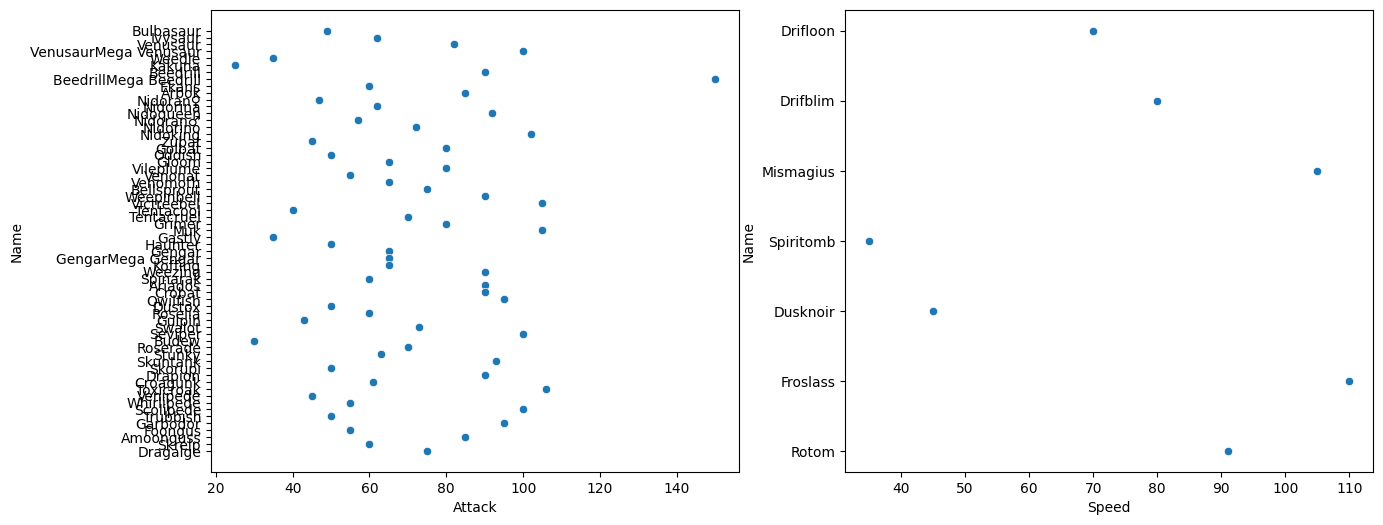

In [14]:
pokemons.reset_index(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(15,6))
#for Q5 we conclude that BeedrillMega Beedrill of  poison type has the strongest attack
df=pokemons[(pokemons['Type 1']=='Poison')| (pokemons['Type 2']=='Poison')]
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df,y='Name',x='Attack',ax=ax[0])
#for Q7, from graph we can conclude that mismagius is second fastest non-legendary 'Ghost' type pokemon from 4th generation.

df=df=pokemons.loc[(pokemons['Generation']==4) & (pokemons['Legendary']==False) & ((pokemons['Type 1']=='Ghost')|(pokemons['Type 2']=='Ghost'))]
sns.scatterplot(data=df,x='Speed',y='Name',ax=ax[1])

<Axes: xlabel='Defense', ylabel='Name'>

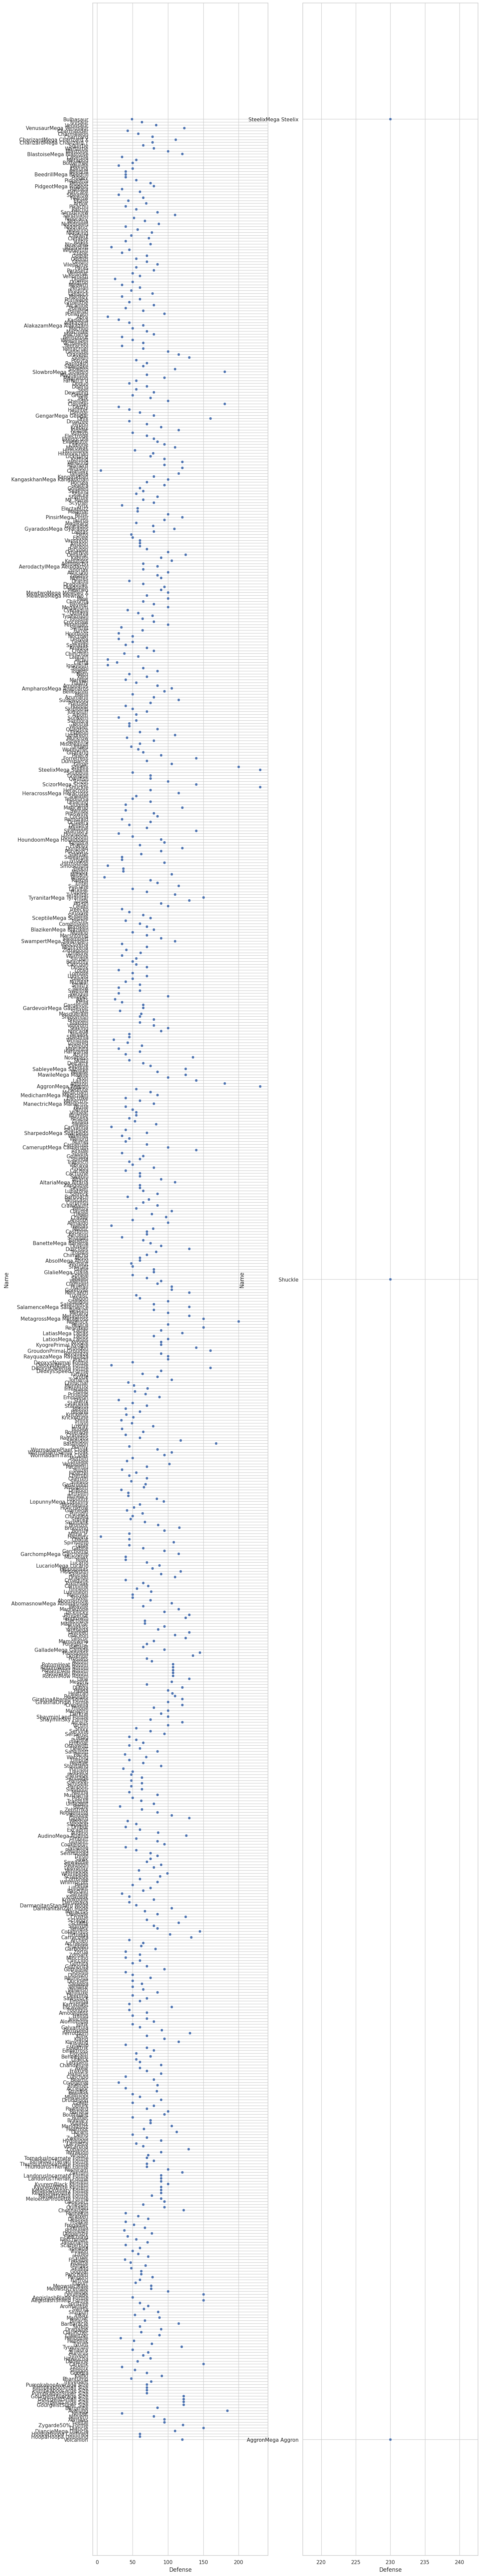

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,100))
sns.set_theme(style="whitegrid")
#for Q4 we found 'SteelixMega Steelix', 'Shuckle', 'AggronMega Aggron'to have maximum defense
df=pokemons[pokemons['Defense']==pokemons['Defense'].max()]
sns.scatterplot(data=pokemons,y='Name',x='Defense',ax=ax[0])
sns.scatterplot(data=df,y='Name',x='Defense',ax=ax[1])

### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [16]:

df=pokemons.loc[(pokemons['Generation']==4) & (pokemons['Legendary']==False) & ((pokemons['Type 1']=='Ghost')|(pokemons['Type 2']=='Ghost'))].sort_values('Speed',ascending=False)
df.iloc[1,0]

'Mismagius'

### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [17]:
pokemons.set_index('Name', inplace=True)
charizard_attack=pokemons.loc['Charizard','Attack']
charizard_defence=pokemons.loc['Charizard','Defense']
num=len(pokemons.loc[(pokemons['Legendary']==False) & (pokemons['Defense']>charizard_defence)&(pokemons['Attack']<charizard_attack)])
print(num)

116



## ***Bonus Questions***
## Here are some bonus questions that you can try further !

### These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [18]:
pokemons['Attack+Sp. Atk']=pokemons['Attack']+pokemons['Sp. Atk']
pokemons[pokemons['Attack+Sp. Atk']==pokemons['Attack+Sp. Atk'].max()].index.values


array(['RayquazaMega Rayquaza', 'DeoxysAttack Forme'], dtype=object)

### Which type of legendary pokemons are the most common?

In [19]:

pokemons[pokemons.Legendary==True].groupby('Type1+Type2').Legendary.value_counts().sort_values(ascending=False).head(1).index.values



array([('Dragon+Psychic', True)], dtype=object)

### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [20]:
min=pokemons[(pokemons['Generation']==6) & (pokemons['Legendary']==True)]['HP'].min()
num=len(pokemons[(pokemons['Generation']==3) & (pokemons['Legendary']==False) & (pokemons['HP']>min)])
print(num)

95


### Print out the third slowest pokemon(s) in the dataset.

In [21]:
unique_speed=np.array(pokemons.Speed.unique())
unique_speed.sort()
pokemons.loc[pokemons['Speed']==unique_speed[2]].index.values


array(['Slowpoke', 'Cleffa', 'Igglybuff', 'Wooper', 'Pineco', 'Silcoon',
       'Cascoon', 'Roggenrola', 'Foongus'], dtype=object)

### Which pokemon type has the highest average HP?

In [22]:
pokemons.groupby('Type1+Type2').HP.mean().sort_values(ascending=False).head(1).index.values


array(['Ghost+Dragon'], dtype=object)